### This notebook will be mainly used for the capstone project

In [118]:
#Importing all the necessary libraries

import numpy as np
import pandas as pd
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting 
import matplotlib.cm as cm
import matplotlib.colors as colors

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [105]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

#### Directly reading the file using pandas

In [106]:
df = pd.read_html(url)[0]

In [107]:
df.head()

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


#### Checking whether there is any row exists that has some "Borough" assigned to it but not the "Neighborhood"  

In [109]:
df[df["Neighborhood"].isnull()]

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
7,M8A,Not assigned,NaN
10,M2B,Not assigned,NaN
15,M7B,Not assigned,NaN
16,M8B,Not assigned,NaN
19,M2C,Not assigned,NaN
24,M7C,Not assigned,NaN
25,M8C,Not assigned,NaN
28,M2E,Not assigned,NaN


#### Dropping all the rows that do not have any assigned value to "Borough"

In [110]:
df.drop(df[df["Borough"] == "Not assigned"].index,inplace = True)

In [111]:
df.head()

,Postal code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


#### Resetting the index

In [112]:
df.reset_index(drop = True, inplace = True)

In [113]:
df.head()

,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


#### Replacing all the "/" with "," as per the instructions

In [114]:
df["Neighborhood"] = df["Neighborhood"].str.replace("/",",")

In [115]:
df.head()

,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"


## 1st Question - Printing the shape of the Dataframe

In [116]:
df.shape

(103, 3)

#### Below I tried to use looping to get the coordinates but couldn't get it so I had to interrupt the Kernel

In [190]:
import geocoder

for postal_code in df["Postal code"]:
    g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
    lat_lng_coords = g.latlng
    
    while(lat_lng_coords is None ):
        g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        lat_lng_coords = g.latlng

    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]

KeyboardInterrupt: 

#### Using the csv file provided in the instruction section of the lab

In [191]:
postal_code_df = pd.read_csv("Geospatial_Coordinates.csv")
postal_code_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [192]:
postal_code_df.shape

(103, 3)

## 2nd Question - Creating a Dataframe with Lat and Long of the locations

In [198]:
main_df = df.merge(postal_code_df, how = "left", left_on= "Postal code", right_on="Postal Code")
main_df.drop("Postal Code", axis = 1, inplace = True)
main_df.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494


In [199]:
main_df.shape

(103, 5)

### Analysis part begins from here

In [200]:
main_df["Borough"].value_counts()

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
East Toronto         5
York                 5
East York            5
Mississauga          1
Name: Borough, dtype: int64

In [207]:
print('The dataframe has {} boroughs'.format(len(main_df['Borough'].unique())))

The dataframe has 10 boroughs


In [209]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Toronto City are 43.6534817, -79.3839347.


In [211]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(main_df['Latitude'], main_df['Longitude'], main_df['Borough'], main_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    

map_toronto

#### Picking up "North York" borough to work on as it has got highest number of neighborhoods

In [213]:
nyork_data = main_df[main_df["Borough"] == "North York"].reset_index(drop = True)
nyork_data.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
3,M3B,North York,Don Mills,43.745906,-79.352188
4,M6B,North York,Glencairn,43.709577,-79.445073


In [221]:
nyork_data.shape

(24, 5)

In [214]:
address = 'North York, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of North York are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of North York are 43.7543263, -79.44911696639593.


### Map of all the Neighborhoods of North York 

In [215]:
# Creating map of North York using latitude and longitude values
map_nyork = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(nyork_data['Latitude'], nyork_data['Longitude'], nyork_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nyork)  
    
map_nyork

In [216]:
CLIENT_ID = '02KKOKDRFRUGOAISBXATZADDF5UX3ZZ1RGV2HCQX2D04AWUF' # your Foursquare ID
CLIENT_SECRET = 'KDN1BDJHEKMFB2INWQODS0KTEZJOX4CJTAUZ111GILVUQQNA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: 02KKOKDRFRUGOAISBXATZADDF5UX3ZZ1RGV2HCQX2D04AWUF
CLIENT_SECRET:KDN1BDJHEKMFB2INWQODS0KTEZJOX4CJTAUZ111GILVUQQNA


#### Exploring the first Neighborhood in the North York Dataframe

In [219]:
neighborhood1 = nyork_data.iloc[0,2]
neighborhood1

'Parkwoods'

In [220]:
neighborhood1_latitude = nyork_data.loc[0, 'Latitude'] 
neighborhood1_longitude = nyork_data.loc[0, 'Longitude']

neighborhood1_name = nyork_data.loc[0, 'Neighborhood']

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood1_name, 
                                                               neighborhood1_latitude, 
                                                               neighborhood1_longitude))

Latitude and longitude values of Parkwoods are 43.7532586, -79.3296565.


#### Now, let's get the top 100 venues that are in Marble Hill within a radius of 1000 meters.

In [231]:
RADIUS = 1000
LIMIT = 100

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood1_latitude, neighborhood1_longitude, RADIUS, LIMIT)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e8e56725fb726001bebbe8f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Parkwoods - Donalda',
  'headerFullLocation': 'Parkwoods - Donalda, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 30,
  'suggestedBounds': {'ne': {'lat': 43.762258609000014,
    'lng': -79.31721997969855},
   'sw': {'lat': 43.74425859099999, 'lng': -79.34209302030145}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b8991cbf964a520814232e3',
       'name': "Allwyn's Bakery",
       'location': {'address': '81 Underhill drive',
        'lat': 43.75984035203157,
        'lng': -79.32471879917513,
        'labeledLatLngs': [{'label': 'display'

In [232]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [233]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Allwyn's Bakery,Caribbean Restaurant,43.759840,-79.324719
1,Brookbanks Park,Park,43.751976,-79.332140
2,Tim Hortons,Café,43.760668,-79.326368
3,A&W,Fast Food Restaurant,43.760643,-79.326865
4,Bruno's valu-mart,Grocery Store,43.746143,-79.324630


In [290]:
print('{} venues were returned around Parkwoods neighborhood by Foursquare.'.format(nearby_venues.shape[0]))

30 venues were returned around Parkwoods neighborhood by Foursquare.


### Finding venues around all the different Neighborhoods in borough "North York"

In [236]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            RADIUS, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [237]:
nearby_venues.head()

,name,categories,lat,lng
0,Allwyn's Bakery,Caribbean Restaurant,43.759840,-79.324719
1,Brookbanks Park,Park,43.751976,-79.332140
2,Tim Hortons,Café,43.760668,-79.326368
3,A&W,Fast Food Restaurant,43.760643,-79.326865
4,Bruno's valu-mart,Grocery Store,43.746143,-79.324630


In [238]:
nyork_venues = getNearbyVenues(names=nyork_data['Neighborhood'],
                                   latitudes=nyork_data['Latitude'],
                                   longitudes=nyork_data['Longitude']
                                  )



Parkwoods
Victoria Village
Lawrence Manor , Lawrence Heights
Don Mills
Glencairn
Don Mills
Hillcrest Village
Bathurst Manor , Wilson Heights , Downsview North
Fairview , Henry Farm , Oriole
Northwood Park , York University
Bayview Village
Downsview
York Mills , Silver Hills
Downsview
North Park , Maple Leaf Park , Upwood Park
Humber Summit
Willowdale , Newtonbrook
Downsview
Bedford Park , Lawrence Manor East
Humberlea , Emery
Willowdale
Downsview
York Mills West
Willowdale


In [239]:
nyork_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
2,Parkwoods,43.753259,-79.329656,Tim Hortons,43.760668,-79.326368,Café
3,Parkwoods,43.753259,-79.329656,A&W,43.760643,-79.326865,Fast Food Restaurant
4,Parkwoods,43.753259,-79.329656,Bruno's valu-mart,43.746143,-79.324630,Grocery Store


In [240]:
nyork_venues.shape

(637, 7)

Let's check how many venues were returned for each neighborhood

In [241]:
nyork_venues.groupby(by="Neighborhood").count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Bathurst Manor , Wilson Heights , Downsview North",30,30,30,30,30,30
Bayview Village,16,16,16,16,16,16
"Bedford Park , Lawrence Manor East",40,40,40,40,40,40
Don Mills,74,74,74,74,74,74
Downsview,65,65,65,65,65,65
"Fairview , Henry Farm , Oriole",44,44,44,44,44,44
Glencairn,34,34,34,34,34,34
Hillcrest Village,20,20,20,20,20,20
Humber Summit,11,11,11,11,11,11


#### Let's find out how many unique categories can be curated from all the returned venues

In [242]:
print('There are {} uniques categories.'.format(len(nyork_venues['Venue Category'].unique())))

There are 154 uniques categories.


### Analyzing each neighborhood 

In [243]:
nyork_onehot = pd.get_dummies(nyork_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nyork_onehot['Neighborhood'] = nyork_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [nyork_onehot.columns[-1]] + list(nyork_onehot.columns[:-1])
nyork_onehot = nyork_onehot[fixed_columns]

nyork_onehot.head()

,Neighborhood,Accessories Store,Airport,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Store,Bike Shop,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Stop,Business Service,Butcher,Cafeteria,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Fast Food Restaurant,Fireworks Store,Fish & Chips Shop,Fish Market,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,History Museum,Hockey Arena,Hookah Bar,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Liquor Store,Locksmith,Lounge,Massage Studio,Mediterranean Restaurant,Men's Store,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Moving Target,Office,Optical Shop,Other Repair Shop,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Photography Lab,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Ski Area,Ski Chalet,Snack Place,Soccer Field,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [244]:
nyork_onehot.shape

(637, 155)

In [246]:
nyork_grouped = nyork_onehot.groupby('Neighborhood').mean().reset_index()
nyork_grouped

,Neighborhood,Accessories Store,Airport,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Store,Bike Shop,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Stop,Business Service,Butcher,Cafeteria,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Fast Food Restaurant,Fireworks Store,Fish & Chips Shop,Fish Market,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,History Museum,Hockey Arena,Hookah Bar,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Liquor Store,Locksmith,Lounge,Massage Studio,Mediterranean Restaurant,Men's Store,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Moving Target,Office,Optical Shop,Other Repair Shop,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Photography Lab,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Ski Area,Ski Chalet,Snack Place,Soccer Field,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Women's Store,Yoga Studio
0,"Bathurst Manor , Wilson Heights , Downsview North",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.00,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.033333,0.033333,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.033333,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000,0.000000,0.000000
1,Bayview Village,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

#### Let's print each neighborhood along with the top 5 most common venues

In [302]:
num_top_venues = 5

for hood in nyork_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = nyork_grouped[nyork_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bathurst Manor , Wilson Heights , Downsview North----
                venue  freq
0                Bank  0.07
1         Coffee Shop  0.07
2    Community Center  0.03
3         Gas Station  0.03
4  Frozen Yogurt Shop  0.03


----Bayview Village----
                 venue  freq
0          Gas Station  0.12
1  Japanese Restaurant  0.12
2                 Bank  0.12
3        Grocery Store  0.12
4         Intersection  0.06


----Bedford Park , Lawrence Manor East----
                  venue  freq
0    Italian Restaurant  0.08
1           Coffee Shop  0.08
2                  Bank  0.05
3            Restaurant  0.05
4  Fast Food Restaurant  0.05


----Don Mills----
                 venue  freq
0           Restaurant  0.09
1          Coffee Shop  0.08
2  Japanese Restaurant  0.07
3                 Bank  0.04
4         Burger Joint  0.04


----Downsview----
                   venue  freq
0  Vietnamese Restaurant  0.08
1                  Hotel  0.06
2            Coffee Shop  0.06
3          

In [303]:
# function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood

In [304]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nyork_grouped['Neighborhood']

for ind in np.arange(nyork_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyork_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bathurst Manor , Wilson Heights , Downsview North",Coffee Shop,Bank,Gift Shop,Mediterranean Restaurant,Shopping Mall,Dog Run,Sandwich Place,Diner,Restaurant,Men's Store
1,Bayview Village,Japanese Restaurant,Grocery Store,Gas Station,Bank,Skating Rink,Shopping Mall,Park,Trail,Intersection,Café
2,"Bedford Park , Lawrence Manor East",Italian Restaurant,Coffee Shop,Restaurant,Bank,Pizza Place,Sandwich Place,Fast Food Restaurant,Bridal Shop,Intersection,Juice Bar
3,Don Mills,Restaurant,Coffee Shop,Japanese Restaurant,Gym,Supermarket,Burger Joint,Bank,Sporting Goods Shop,Pizza Place,Beer Store
4,Downsview,Vietnamese Restaurant,Coffee Shop,Hotel,Gas Station,Park,Pizza Place,Grocery Store,Fast Food Restaurant,Sandwich Place,Chinese Restaurant


### Using Elbow method to determine the best of value of k

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

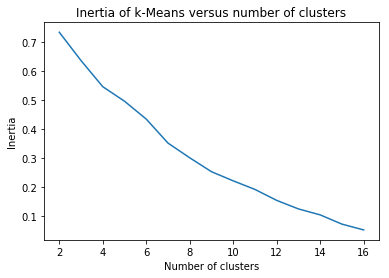

In [398]:
scores = [KMeans(n_clusters=i+2).fit(nyork_grouped_clustering).inertia_ 
          for i in range(15)]
sns.lineplot(np.arange(2, 17),scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

From the above plot it can be concluded that apparently there is no best suitable value of k for this particular data  

In [578]:
# Trying with 5 clusters
kclusters = 5

nyork_grouped_clustering = nyork_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyork_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 0, 1, 1, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1])

In [579]:
from sklearn.metrics import silhouette_score
print('kmeans: {}'.format(silhouette_score(nyork_grouped_clustering, kmeans.labels_, 
                                           metric='euclidean')))

kmeans: 0.15185248340037005


Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [582]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted['Cluster Labels'] = kmeans.labels_

nyork_merged = nyork_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nyork_merged = nyork_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

#nyork_merged.drop(" New Cluster Labels", axis=1, inplace = True)
nyork_merged.head() # check the last columns!

,Postal code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,1,Park,Pharmacy,Convenience Store,Shopping Mall,Bus Stop,Coffee Shop,Discount Store,Skating Rink,Shop & Service,Road
1,M4A,North York,Victoria Village,43.725882,-79.315572,1,Coffee Shop,Hockey Arena,Intersection,Park,Café,Men's Store,Sporting Goods Shop,Portuguese Restaurant,Gym / Fitness Center,Grocery Store
2,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763,1,Restaurant,Clothing Store,Coffee Shop,Fast Food Restaurant,Furniture / Home Store,Fried Chicken Joint,Dessert Shop,Sushi Restaurant,Vietnamese Restaurant,Fireworks Store
3,M3B,North York,Don Mills,43.745906,-79.352188,1,Restaurant,Coffee Shop,Japanese Restaurant,Gym,Supermarket,Burger Joint,Bank,Sporting Goods Shop,Pizza Place,Beer Store
4,M6B,North York,Glencairn,43.709577,-79.445073,1,Grocery Store,Fast Food Restaurant,Gas Station,Gym,Park,Coffee Shop,Restaurant,Shoe Store,Mediterranean Restaurant,Discount Store


### Mapping the 5 Clusters

In [502]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyork_merged['Latitude'], nyork_merged['Longitude'], nyork_merged['Neighborhood'], nyork_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)


map_clusters



In [484]:
# Trying with 7 clusters
kclusters = 7

nyork_grouped_clustering = nyork_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyork_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([5, 1, 5, 5, 5, 5, 1, 5, 4, 3])

In [485]:
print('kmeans: {}'.format(silhouette_score(nyork_grouped_clustering, kmeans.labels_, 
                                           metric='euclidean')))

kmeans: 0.0873908809569236


The silhouette score is very low for 7 clusters so not going into further analysis but still mapping it

In [481]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, ' New Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted[' New Cluster Labels'] = kmeans.labels_

nyork_merged = nyork_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nyork_merged = nyork_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

nyork_merged.head() # check the last columns!

,Postal code,Borough,Neighborhood,Latitude,Longitude,New Cluster Labels,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,5,1,Park,Pharmacy,Convenience Store,Shopping Mall,Bus Stop,Coffee Shop,Discount Store,Skating Rink,Shop & Service,Road
1,M4A,North York,Victoria Village,43.725882,-79.315572,6,1,Coffee Shop,Hockey Arena,Intersection,Park,Café,Men's Store,Sporting Goods Shop,Portuguese Restaurant,Gym / Fitness Center,Grocery Store
2,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763,5,1,Restaurant,Clothing Store,Coffee Shop,Fast Food Restaurant,Furniture / Home Store,Fried Chicken Joint,Dessert Shop,Sushi Restaurant,Vietnamese Restaurant,Fireworks Store
3,M3B,North York,Don Mills,43.745906,-79.352188,5,1,Restaurant,Coffee Shop,Japanese Restaurant,Gym,Supermarket,Burger Joint,Bank,Sporting Goods Shop,Pizza Place,Beer Store
4,M6B,North York,Glencairn,43.709577,-79.445073,1,1,Grocery Store,Fast Food Restaurant,Gas Station,Gym,Park,Coffee Shop,Restaurant,Shoe Store,Mediterranean Restaurant,Discount Store


In [483]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyork_merged['Latitude'], nyork_merged['Longitude'], nyork_merged['Neighborhood'], nyork_merged[' New Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Segmenting and Analyszing the Cluster's Data

In [709]:
nyork_merged.groupby("Cluster Labels")["1st Most Common Venue"].value_counts()

Cluster Labels  1st Most Common Venue
0               Japanese Restaurant      1
1               Coffee Shop              6
                Vietnamese Restaurant    4
                Restaurant               3
                Clothing Store           1
                Grocery Store            1
                Italian Restaurant       1
                Korean Restaurant        1
                Park                     1
                Pharmacy                 1
                Pizza Place              1
2               Park                     1
3               Convenience Store        1
4               Electronics Store        1
Name: 1st Most Common Venue, dtype: int64

In [710]:
cluster0 = nyork_merged[nyork_merged["Cluster Labels"] == 0]
cluster0.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,M2K,North York,Bayview Village,43.786947,-79.385975,0,Japanese Restaurant,Grocery Store,Gas Station,Bank,Skating Rink,Shopping Mall,Park,Trail,Intersection,Café


In [607]:
cluster1 = nyork_merged[nyork_merged["Cluster Labels"] == 1]
cluster1.head(3)

,Postal code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,1,Park,Pharmacy,Convenience Store,Shopping Mall,Bus Stop,Coffee Shop,Discount Store,Skating Rink,Shop & Service,Road
1,M4A,North York,Victoria Village,43.725882,-79.315572,1,Coffee Shop,Hockey Arena,Intersection,Park,Café,Men's Store,Sporting Goods Shop,Portuguese Restaurant,Gym / Fitness Center,Grocery Store
2,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763,1,Restaurant,Clothing Store,Coffee Shop,Fast Food Restaurant,Furniture / Home Store,Fried Chicken Joint,Dessert Shop,Sushi Restaurant,Vietnamese Restaurant,Fireworks Store


In [715]:
cluster1["1st Most Common Venue"].value_counts()

Coffee Shop              6
Vietnamese Restaurant    4
Restaurant               3
Pharmacy                 1
Park                     1
Italian Restaurant       1
Pizza Place              1
Korean Restaurant        1
Grocery Store            1
Clothing Store           1
Name: 1st Most Common Venue, dtype: int64

In [716]:
cluster1["2nd Most Common Venue"].value_counts()

Coffee Shop                 9
Pizza Place                 2
Mediterranean Restaurant    1
Park                        1
Fast Food Restaurant        1
Hockey Arena                1
Bank                        1
Pharmacy                    1
Restaurant                  1
Café                        1
Clothing Store              1
Name: 2nd Most Common Venue, dtype: int64

In [717]:
cluster1["3rd Most Common Venue"].value_counts()

Hotel                     4
Park                      2
Coffee Shop               2
Japanese Restaurant       2
Convenience Store         2
Ramen Restaurant          2
Sandwich Place            1
Gas Station               1
Intersection              1
Restaurant                1
Gift Shop                 1
Furniture / Home Store    1
Name: 3rd Most Common Venue, dtype: int64

In [718]:
cluster2 = nyork_merged[nyork_merged["Cluster Labels"] == 2]
cluster2.head(3)

,Postal code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,M2L,North York,"York Mills , Silver Hills",43.75749,-79.374714,2,Park,Pool,Yoga Studio,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Doner Restaurant,Dog Run,Discount Store


In [719]:
cluster3 = nyork_merged[nyork_merged["Cluster Labels"] == 3]
cluster3.head(3)

,Postal code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,M9M,North York,"Humberlea , Emery",43.724766,-79.532242,3,Convenience Store,Business Service,Storage Facility,Intersection,Golf Course,Bakery,Gas Station,Park,Discount Store,Dog Run


In [720]:
cluster4 = nyork_merged[nyork_merged["Cluster Labels"] == 4]
cluster4.head(3)

,Postal code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,M9L,North York,Humber Summit,43.756303,-79.565963,4,Electronics Store,Italian Restaurant,Park,Shopping Mall,Bank,Bakery,Empanada Restaurant,Pharmacy,Arts & Crafts Store,Pizza Place


### Getting top 10 most common venues of all the five clusters in single dataframe

In [711]:
df_top10 = pd.DataFrame(data= [cluster0.iloc[0,6:].values, 
                               cluster2.iloc[0,6:].values,
                               cluster3.iloc[0,6:].values,
                               cluster4.iloc[0,6:].values])
df_top10 = df_top10.T
df_top10.columns = ["Top 10 Venues of Cluster0", "Top 10 Venues of Cluster2", 
                    "Top 10 Venues of Cluster3", "Top 10 Venues of Cluster4"]
df_top10

,Top 10 Venues of Cluster0,Top 10 Venues of Cluster2,Top 10 Venues of Cluster3,Top 10 Venues of Cluster4
0,Japanese Restaurant,Park,Convenience Store,Electronics Store
1,Grocery Store,Pool,Business Service,Italian Restaurant
2,Gas Station,Yoga Studio,Storage Facility,Park
3,Bank,Empanada Restaurant,Intersection,Shopping Mall
4,Skating Rink,Electronics Store,Golf Course,Bank
5,Shopping Mall,Eastern European Restaurant,Bakery,Bakery
6,Park,Dumpling Restaurant,Gas Station,Empanada Restaurant
7,Trail,Doner Restaurant,Park,Pharmacy
8,Intersection,Dog Run,Discount Store,Arts & Crafts Store
9,Café,Discount Store,Dog Run,Pizza Place


In [712]:
cluster1_df = pd.DataFrame([cluster1["1st Most Common Venue"].value_counts().head(1).index,
              cluster1["2nd Most Common Venue"].value_counts().head(1).index,
              cluster1["3rd Most Common Venue"].value_counts().head(1).index,
              cluster1["4th Most Common Venue"].value_counts().head(1).index,
              cluster1["5th Most Common Venue"].value_counts().head(1).index,
              cluster1["6th Most Common Venue"].value_counts().head(1).index,
              cluster1["7th Most Common Venue"].value_counts().head(1).index,
              cluster1["8th Most Common Venue"].value_counts().head(1).index,
              cluster1["9th Most Common Venue"].value_counts().head(1).index,
              cluster1["10th Most Common Venue"].value_counts().head(1).index],
              columns = ["Top 10 Venues of Cluster1"])
cluster1_df

,Top 10 Venues of Cluster1
0,Coffee Shop
1,Coffee Shop
2,Hotel
3,Gas Station
4,Park
5,Pizza Place
6,Grocery Store
7,Fast Food Restaurant
8,Sandwich Place
9,Chinese Restaurant


### As Cluster 1 has lot of neighborhoods and lot of common venues around, I have decided to consider just the very top row head(1) which contains highest number of any venue so that I can compare it with the other cluster venues

In [713]:
df_top10 = pd.concat([df_top10, cluster1_df], axis = 1)
df_top10

,Top 10 Venues of Cluster0,Top 10 Venues of Cluster2,Top 10 Venues of Cluster3,Top 10 Venues of Cluster4,Top 10 Venues of Cluster1
0,Japanese Restaurant,Park,Convenience Store,Electronics Store,Coffee Shop
1,Grocery Store,Pool,Business Service,Italian Restaurant,Coffee Shop
2,Gas Station,Yoga Studio,Storage Facility,Park,Hotel
3,Bank,Empanada Restaurant,Intersection,Shopping Mall,Gas Station
4,Skating Rink,Electronics Store,Golf Course,Bank,Park
5,Shopping Mall,Eastern European Restaurant,Bakery,Bakery,Pizza Place
6,Park,Dumpling Restaurant,Gas Station,Empanada Restaurant,Grocery Store
7,Trail,Doner Restaurant,Park,Pharmacy,Fast Food Restaurant
8,Intersection,Dog Run,Discount Store,Arts & Crafts Store,Sandwich Place
9,Café,Discount Store,Dog Run,Pizza Place,Chinese Restaurant


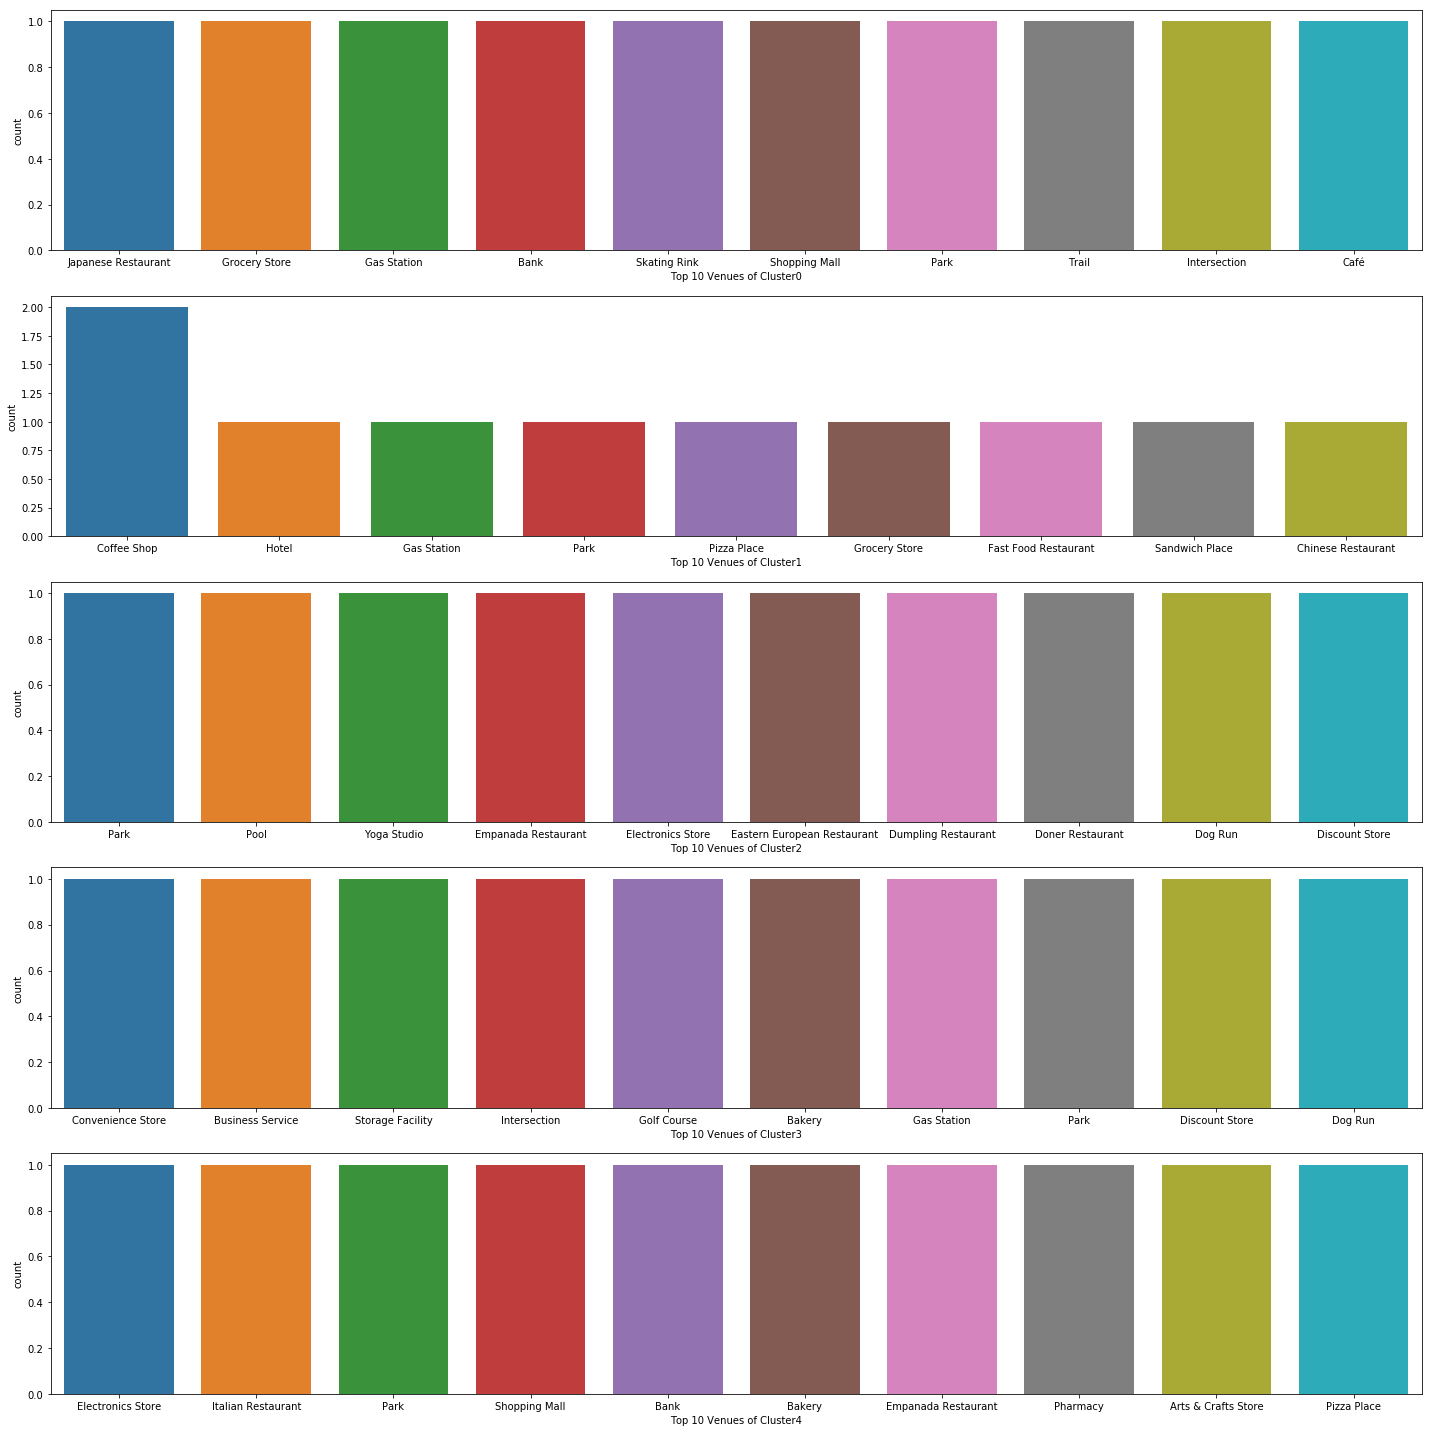

In [797]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize = (20,20))

sns.countplot(df_top10["Top 10 Venues of Cluster0"], ax = ax[0])
sns.countplot(df_top10["Top 10 Venues of Cluster1"], ax = ax[1])
sns.countplot(df_top10["Top 10 Venues of Cluster2"], ax = ax[2])
sns.countplot(df_top10["Top 10 Venues of Cluster3"], ax = ax[3])
sns.countplot(df_top10["Top 10 Venues of Cluster4"], ax = ax[4])

plt.tight_layout()

#### The plot above shows that all these five clusters have completely different venues (at least top 5) based on which they were classified as different clusters

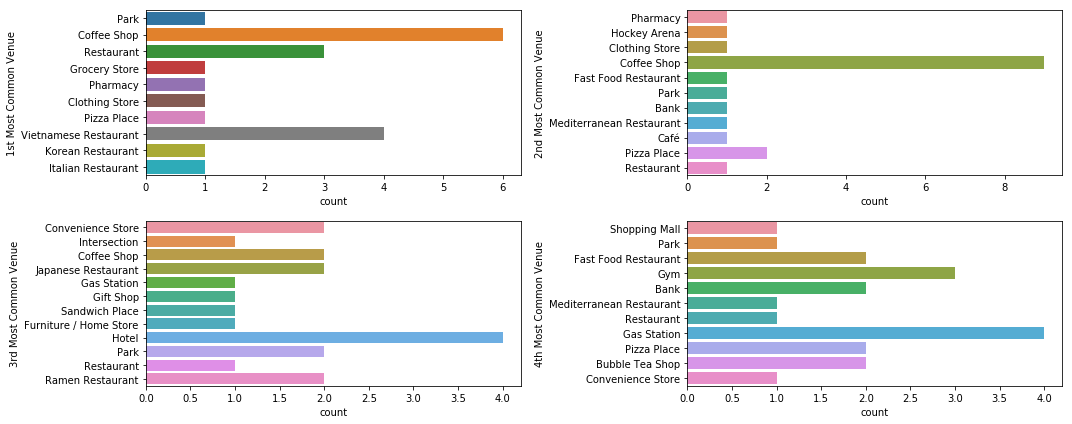

In [788]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (15, 6))


sns.countplot(y = cluster1["1st Most Common Venue"], ax = ax[0,0])
sns.countplot(y = cluster1["2nd Most Common Venue"], ax = ax[0,1])
sns.countplot(y = cluster1["3rd Most Common Venue"], ax = ax[1,0])
sns.countplot(y = cluster1["4th Most Common Venue"], ax = ax[1,1])


plt.tight_layout()

#### From the above plots we can see that high numbers of venues such as "Coffee Shops", "Restaurants", "Hotels", "Gas Stations", "Gym" differentiate Cluster 1 from other Clusters